In [1]:
%load_ext autoreload

import os, sys
import networkx as nx

sys.path.insert(0, "../")
sys.path.insert(0, "/home/j/joppich/.local/lib/python3.11/site-packages/")
#otherwise leidenalg is used in an outdated version ...

import leidenalg as la
print("la", la.version)

%autoreload 2
from mikg.kgraph import *
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

import random
random.seed(42)

import pickle

la 0.10.1


In [2]:
kg = KGraph()
kg.load_kgraph("../data/initial_base_graph.out")

In [3]:
ns = NETSIM(kg)

In [4]:
gs1 = "GO:0009682"
gs2 = "GO:0090721"

print(ns.kg.kg.nodes[gs1]["name"])
print(ns.kg.kg.nodes[gs2]["name"])

print(ns.functional_similarity(gs1, gs2, verbose=True))
print(ns.lca_similarity(gs1, gs2, verbose=True))

induced systemic resistance
primary adaptive immune response involving T cells and B cells
ta GO:0009682 induced systemic resistance
tb GO:0090721 primary adaptive immune response involving T cells and B cells
p GO:0006955 immune response
a_shortest ['GO:0009682', 'GO:0045087', 'GO:0006955']
b_shortest ['GO:0090721', 'GO:0002460', 'GO:0002250', 'GO:0006955']
ga 1
gb 1
gp 1344
gi 0
gj 0
LCA GO:0006955 immune response
None
Utatbp= 1344
dtatb= 1.0
ftatbp= 1344.0
htatb= 43578.0
sim= 0.3156254800811725
0.3156254800811725
ta GO:0009682 induced systemic resistance 4
tb GO:0090721 primary adaptive immune response involving T cells and B cells 5
p GO:0006955 immune response 2
0.4


In [5]:
gs1 = "GO:0045087" #innate immune response
gs2 = "GO:0002250" #adaptive immune response

print(ns.kg.kg.nodes[gs1]["name"])
print(ns.kg.kg.nodes[gs2]["name"])

print(ns.functional_similarity(gs1, gs2, verbose=True))
print(ns.lca_similarity(gs1, gs2, verbose=True))

innate immune response
adaptive immune response
ta GO:0045087 innate immune response
tb GO:0002250 adaptive immune response
p GO:0006955 immune response
a_shortest ['GO:0045087', 'GO:0006955']
b_shortest ['GO:0002250', 'GO:0006955']
ga 592
gb 515
gp 1344
gi 0
gj 0
LCA GO:0006955 immune response
None
Utatbp= 1344
dtatb= 0.1890359168241966
ftatbp= 701.8457115904122
htatb= 8717.897920604915
sim= 0.9392579814798339
0.9392579814798339
ta GO:0045087 innate immune response 3
tb GO:0002250 adaptive immune response 3
p GO:0006955 immune response 2
1.0


In [6]:
gs1 = "GO:0045087" #innate immune response
gs2 = "GO:0140961" #adaptive immune response

print(ns.kg.kg.nodes[gs1]["name"])
print(ns.kg.kg.nodes[gs2]["name"])

print(ns.functional_similarity(gs1, gs2, verbose=True))
print(ns.lca_similarity(gs1, gs2, verbose=True))

innate immune response
cellular detoxification of metal ion
ta GO:0045087 innate immune response
tb GO:0140961 cellular detoxification of metal ion
p GO:0008150 biological_process
a_shortest ['GO:0045087', 'GO:0006955', 'GO:0050896', 'GO:0008150']
b_shortest ['GO:0140961', 'GO:1990748', 'GO:0098754', 'GO:0008150']
ga 592
gb 0
gp 0
gi 0
gj 0
LCA GO:0008150 biological_process
None
0
ta GO:0045087 innate immune response 3
tb GO:0140961 cellular detoxification of metal ion 3
p GO:0008150 biological_process 0
0.3333333333333333


In [7]:
gs1 = "GO:0070488" #innate immune response
gs2 = "GO:0070487" #adaptive immune response

print(ns.kg.kg.nodes[gs1]["name"])
print(ns.kg.kg.nodes[gs2]["name"])

print(ns.functional_similarity(gs1, gs2, verbose=True))
print(ns.lca_similarity(gs1, gs2, verbose=True))

neutrophil aggregation
monocyte aggregation
ta GO:0070488 neutrophil aggregation
tb GO:0070487 monocyte aggregation
p GO:0070486 leukocyte aggregation
a_shortest ['GO:0070488', 'GO:0070486']
b_shortest ['GO:0070487', 'GO:0070486']
ga 2
gb 3
gp 11
gi 0
gj 0
LCA GO:0070486 leukocyte aggregation
None
Utatbp= 11
dtatb= 0.18367346938775508
ftatbp= 4.019991626761778
htatb= 8006.571428571428
sim= 0.9493348361492849
0.9493348361492849
ta GO:0070488 neutrophil aggregation 6
tb GO:0070487 monocyte aggregation 6
p GO:0070486 leukocyte aggregation 5
1.0


In [8]:
gs1 = "GO:0070488"
gs2 = "GO:0002250"

print(ns.kg.kg.nodes[gs1]["name"])
print(ns.kg.kg.nodes[gs2]["name"])

print(ns.functional_similarity(gs1, gs2, verbose=True))
print(ns.lca_similarity(gs1, gs2, verbose=True))

neutrophil aggregation
adaptive immune response
ta GO:0070488 neutrophil aggregation
tb GO:0002250 adaptive immune response
p GO:0008150 biological_process
a_shortest ['GO:0070488', 'GO:0070486', 'GO:0007159', 'GO:0098609', 'GO:0007155', 'GO:0009987', 'GO:0008150']
b_shortest ['GO:0002250', 'GO:0006955', 'GO:0002376', 'GO:0008150']
ga 2
gb 515
gp 17581
gi 0
gj 0
LCA GO:0008150 biological_process
None
Utatbp= 17581
dtatb= 0.9620528177801264
ftatbp= 16915.06845157573
htatb= 41943.88049206558
sim= 0.08024677283331608
0.08024677283331608
ta GO:0070488 neutrophil aggregation 6
tb GO:0002250 adaptive immune response 3
p GO:0008150 biological_process 0
0.2222222222222222


In [9]:
import pickle

with open("diff_sig_kgs.pickle", 'rb') as f:    
    sigKG = pickle.load(f)

In [11]:
mc = ModuleCompare()

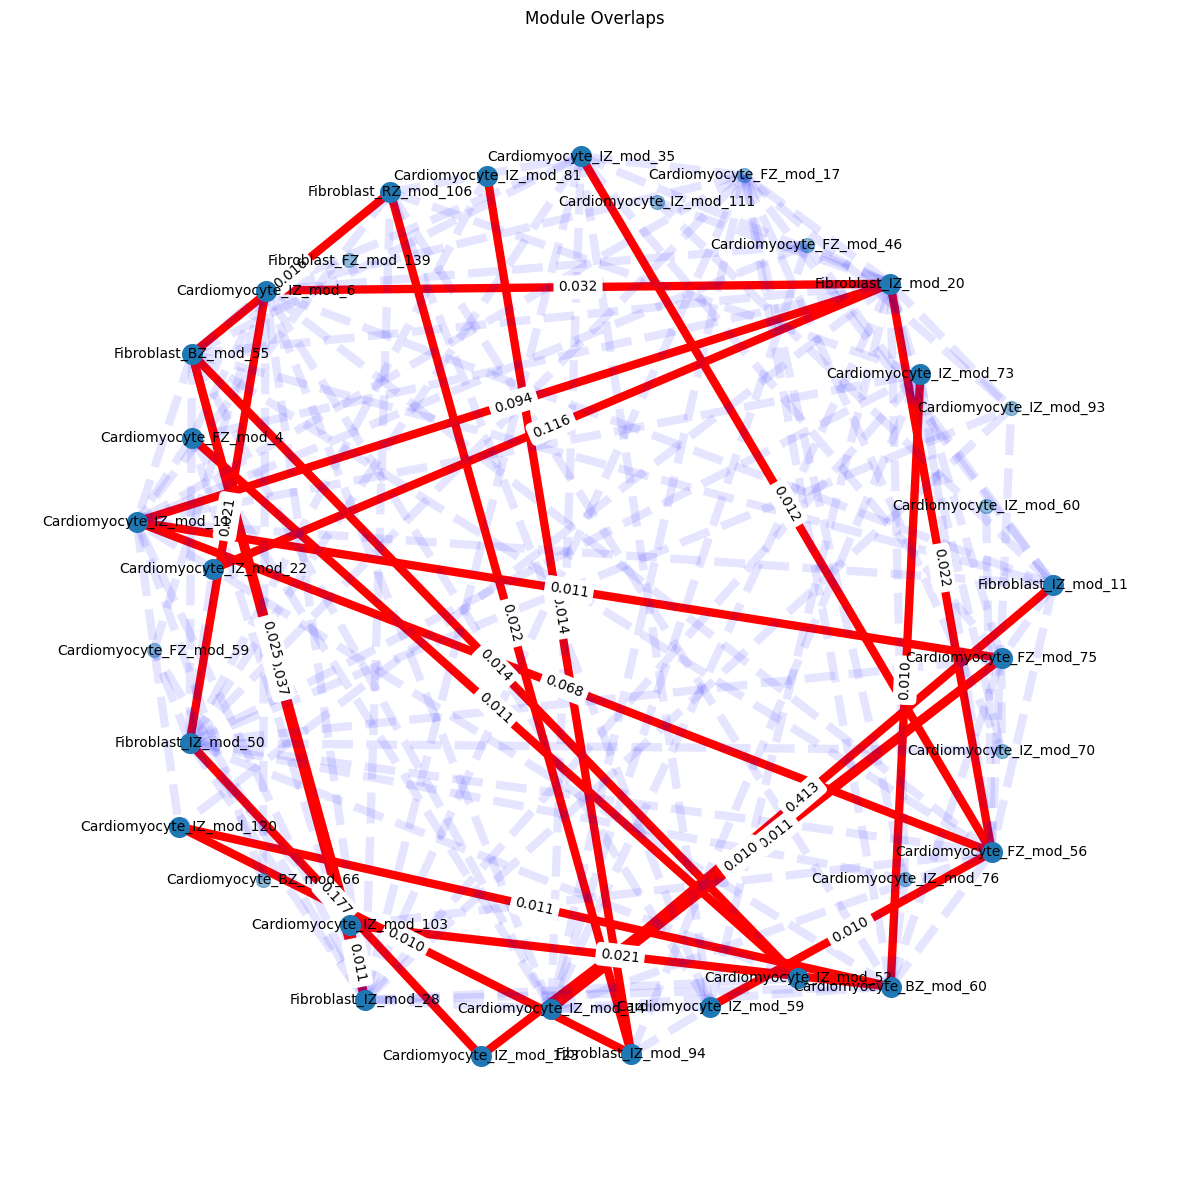

In [53]:
jaccardSims = mc.network_compare_modules(sigKG, measure="jaccard")

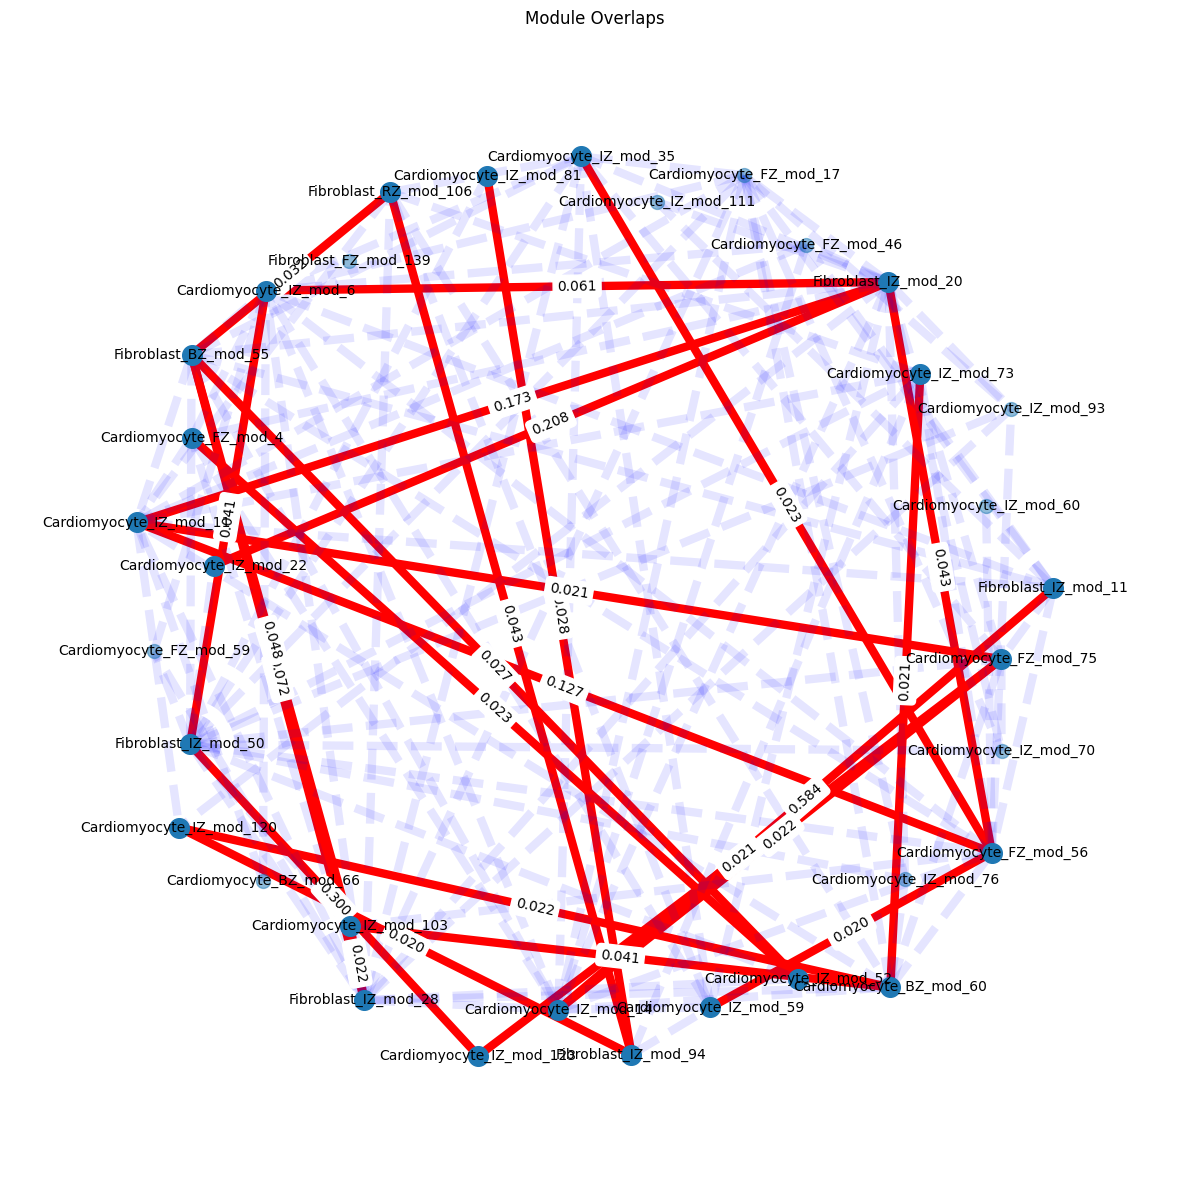

In [54]:
sorensenSims = mc.network_compare_modules(sigKG, measure="sorensen")

|#########################################################| 100% Time:  0:05:27


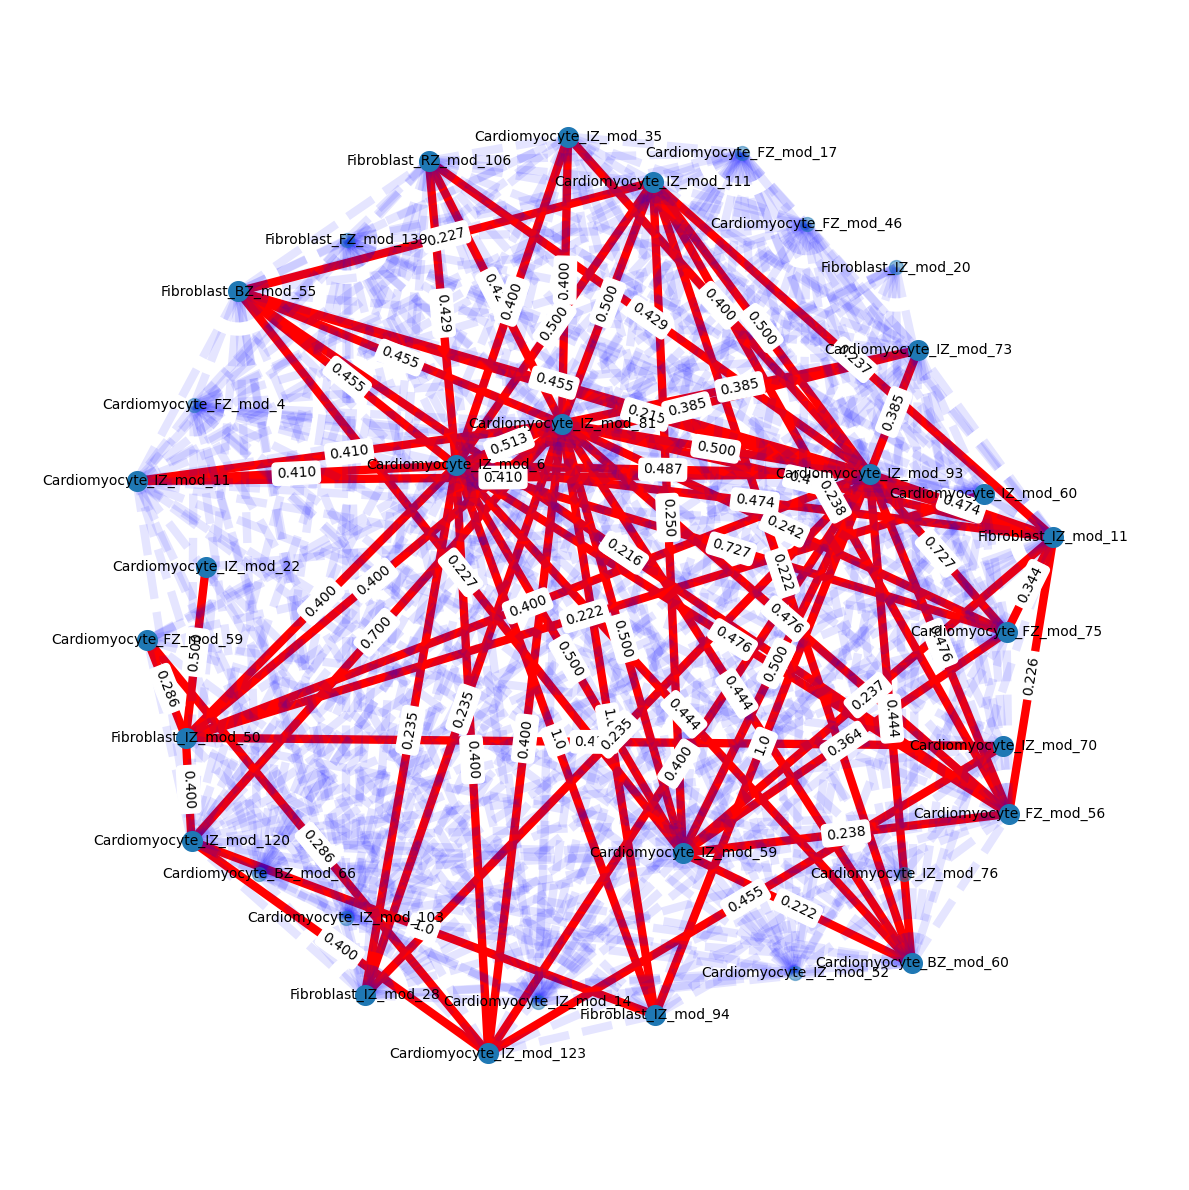

In [26]:
modSims = mc.network_compare_lca(sigKG, ns=ns, max_terms=2)

|#########################################################| 100% Time:  0:45:58


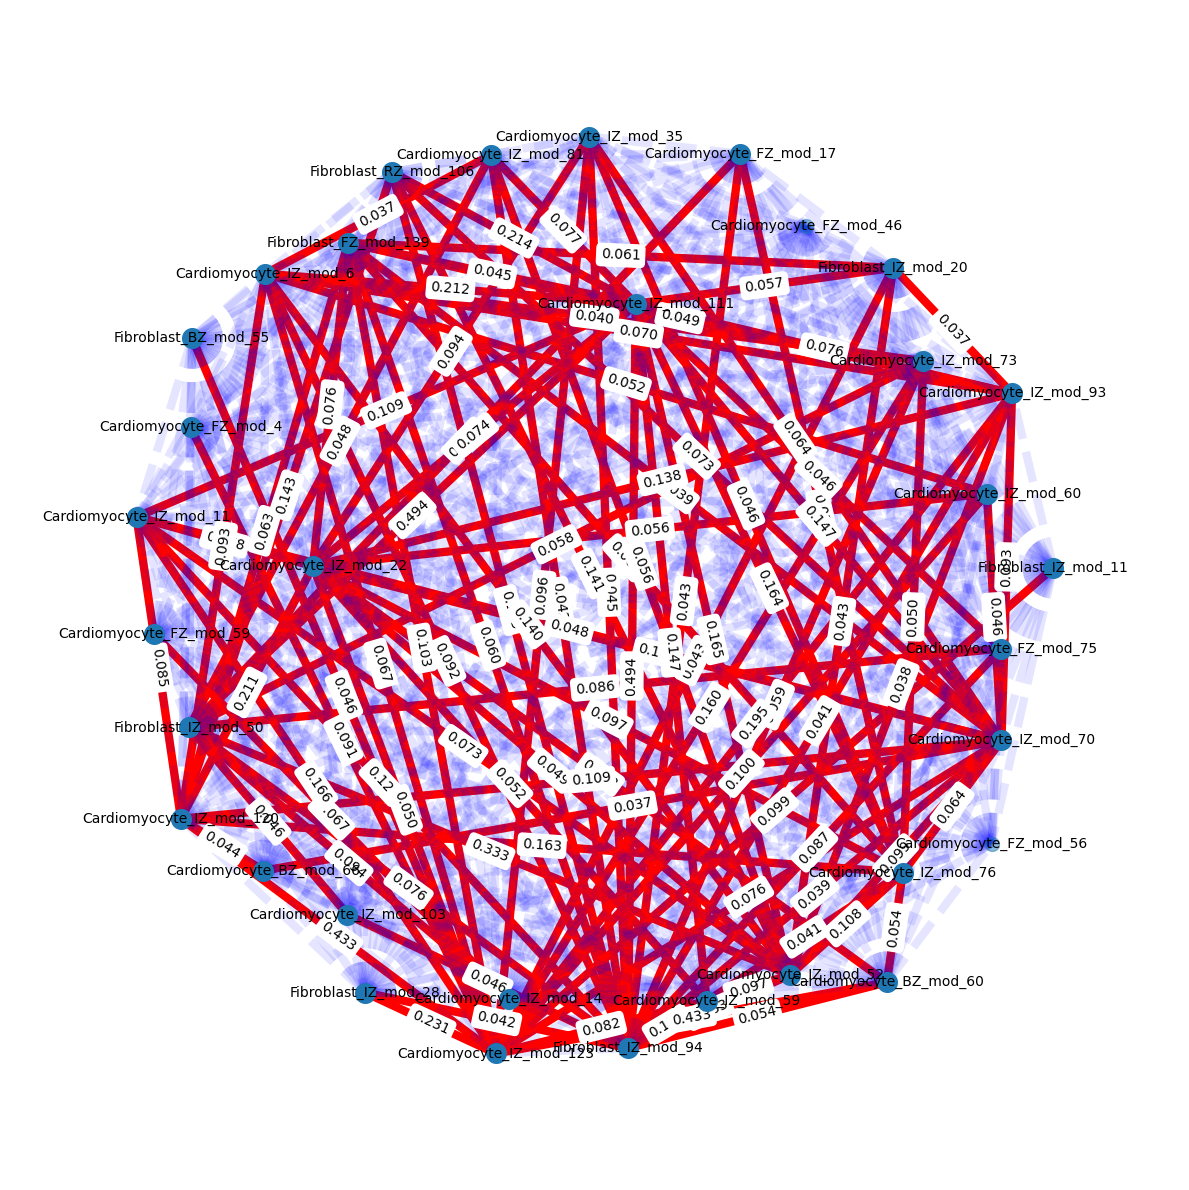

In [38]:
modNetSims = mc.network_compare_netsim(sigKG, ns=ns, max_terms=5)

In [42]:
from natsort import natsorted

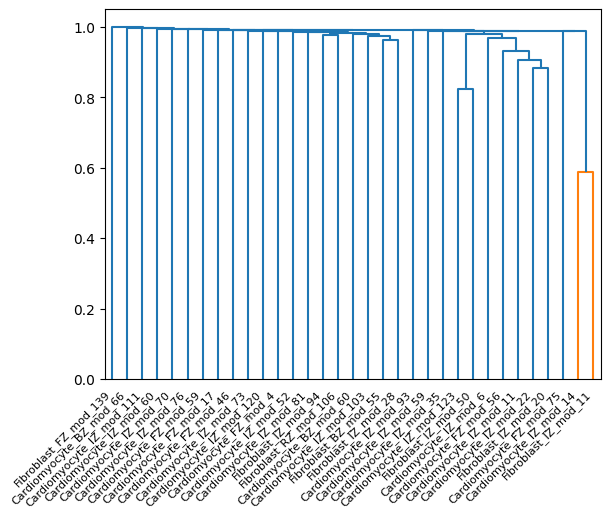

In [55]:
mc.plot_dendrogram(jaccardSims)

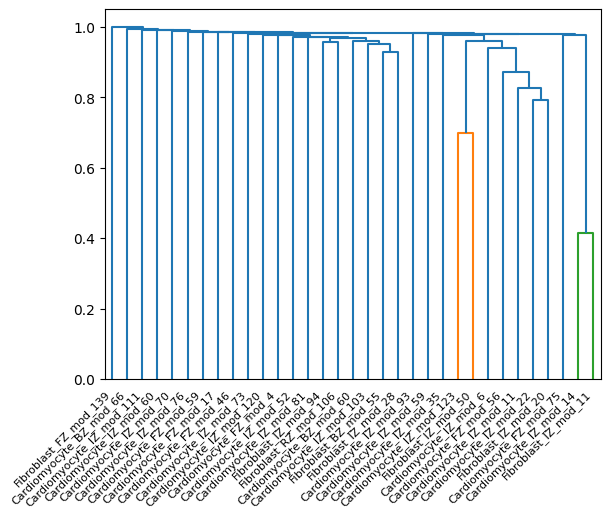

In [56]:
mc.plot_dendrogram(sorensenSims)

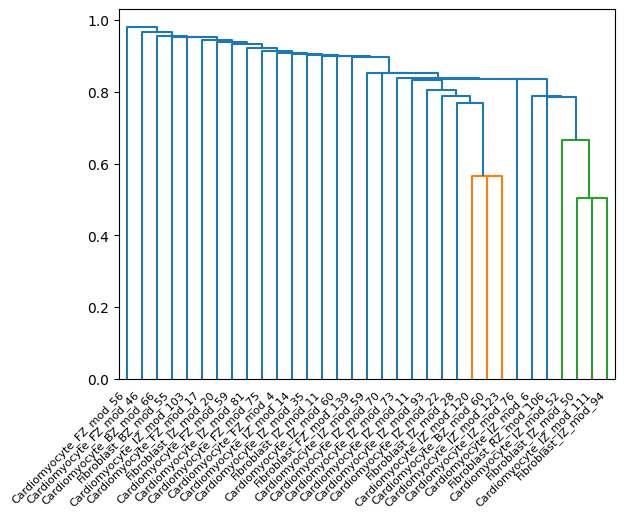

In [51]:
mc.plot_dendrogram(modNetSims)

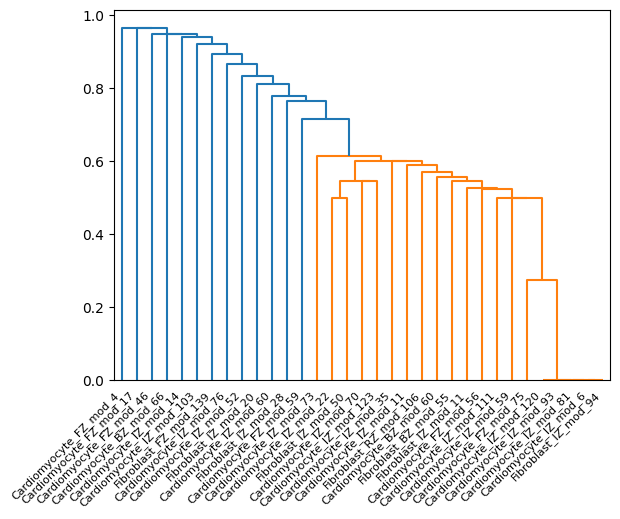

In [52]:
mc.plot_dendrogram(modSims)

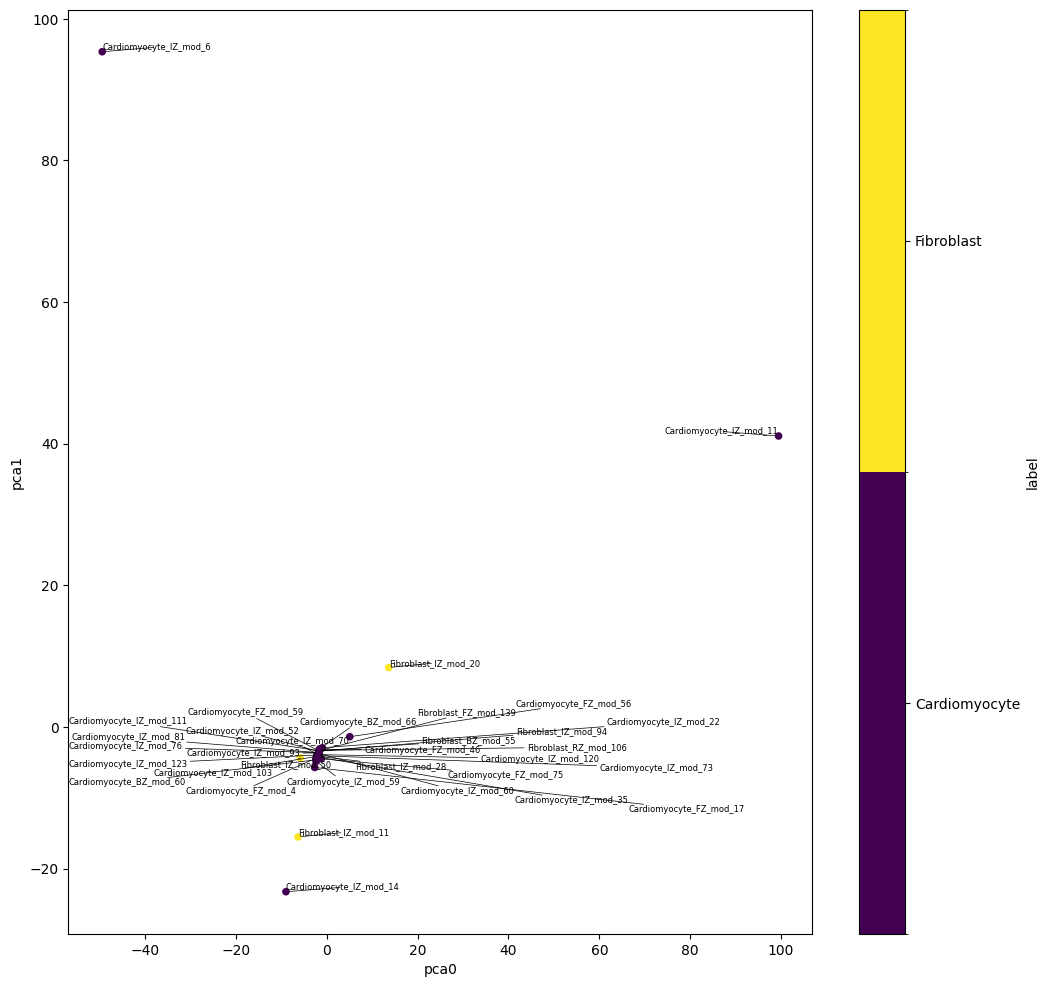

In [14]:
emb = mc.module_umap(sigKG, kg)

In [28]:
with open("diff_sig_dkgs.pickle", 'rb') as f:    
    sigDKG = pickle.load(f)

In [33]:
cr = CRankExplorer()

In [34]:
rankedComms = cr.evaluate_communities(sigKG, sigDKG)
rankedComms

connectivity_score  density_score  boundary_score  allegiance_score  \
2            42.549180       3.828671        1.984806          0.134694   
20           33.639053       2.814496        1.495555          0.115935   
3             5.000000       6.291688        1.890336          0.040726   
30            9.040000       3.440308        1.489463          0.053023   
6             5.175258       4.049144        1.466851          0.051616   
17            7.955556       2.852702        1.512076          0.046538   
19            9.461538       2.557805        1.499712          0.063756   
29            7.807229       2.719715        1.535787          0.043700   
25           16.048193       1.705034        1.171990          0.148800   
26            5.518519       2.662087        1.291706          0.053804   
10           60.903955       0.827342        0.626597          0.281476   
31           10.783784       1.701700        1.268577          0.068279   
11           48.524138       0.814411        0.633466          0.232659   
21            7.041667       2.513789        1.121820          0.074849   
32            3.096774       3.700660        1.519332          0.025960   
14           36.412698       0.758247        0.604420          0.177895   
22            2.952381       3.381061        1.609623          0.016574   
13           12.355556       1.152944        0.716953          0.108309   
15           21.882353       0.757859        0.602620          0.158721   
0             4.571429       3.886818        0.700736          0.033354   
9             5.261261       2.946315        0.587959          0.040998   
8            11.750000       0.959686        0.565190          0.142565   
27            3.761194       2.579561        1.254651          0.040349   
1            17.052632       0.647362        0.434212          0.157097   
7             3.809524       3.801814        0.653951          0.030028   
23            3.333333       2.606711        1.141060          0.018093   
24            4.760925       2.319739        1.160545          0.011029   
18            4.647059       1.596670        1.057389          0.016977   
28            4.092379       2.220282        1.038450          0.011196   
4             3.219512       1.804834        0.960082          0.022731   
16            2.200000       1.684374        1.306094          0.006038   
5             2.350168       2.333772        1.040590          0.009283   
12            2.927711       1.301173        0.454223          0.008972   

                      module  connectivity_score_rank  density_score_rank  \
2       Fibroblast_IZ_mod_11                      3.0                 4.0   
20   Cardiomyocyte_IZ_mod_14                      5.0                11.0   
3       Fibroblast_IZ_mod_94                     20.0                 1.0   
30   Cardiomyocyte_IZ_mod_93                     13.0                 7.0   
6       Fibroblast_IZ_mod_28                     19.0                 2.0   
17   Cardiomyocyte_IZ_mod_81                     14.0                10.0   
19   Cardiomyocyte_IZ_mod_59                     12.0                16.0   
29   Cardiomyocyte_IZ_mod_73                     15.0                12.0   
25  Cardiomyocyte_IZ_mod_103                      8.0                22.0   
26   Cardiomyocyte_IZ_mod_60                     17.0                13.0   
10   Cardiomyocyte_FZ_mod_17                      1.0                29.0   
31  Cardiomyocyte_IZ_mod_120                     11.0                23.0   
11    Cardiomyocyte_FZ_mod_4                      2.0                30.0   
21   Cardiomyocyte_IZ_mod_76                     16.0                17.0   
32   Cardiomyocyte_IZ_mod_52                     29.0                 6.0   
14   Cardiomyocyte_FZ_mod_75                      4.0                31.0   
22  Cardiomyocyte_IZ_mod_111                     30.0                 8.0   
13   Cardiomyocyte_FZ_mod_46                      9.0              

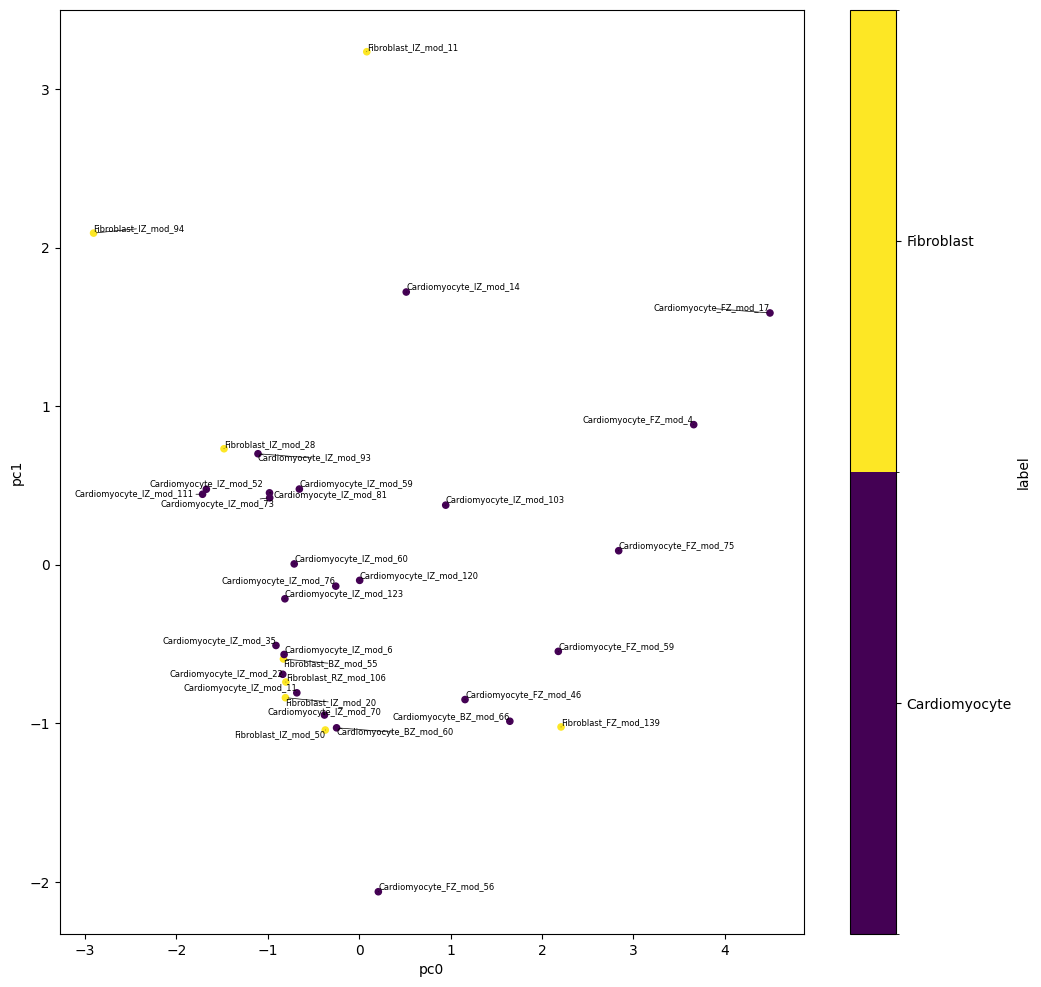

In [36]:
cr.plot_scores(rankedComms)

In [57]:
1+1

2